
Motion blur 

##Imports


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow
from random import randint

## now we import our image

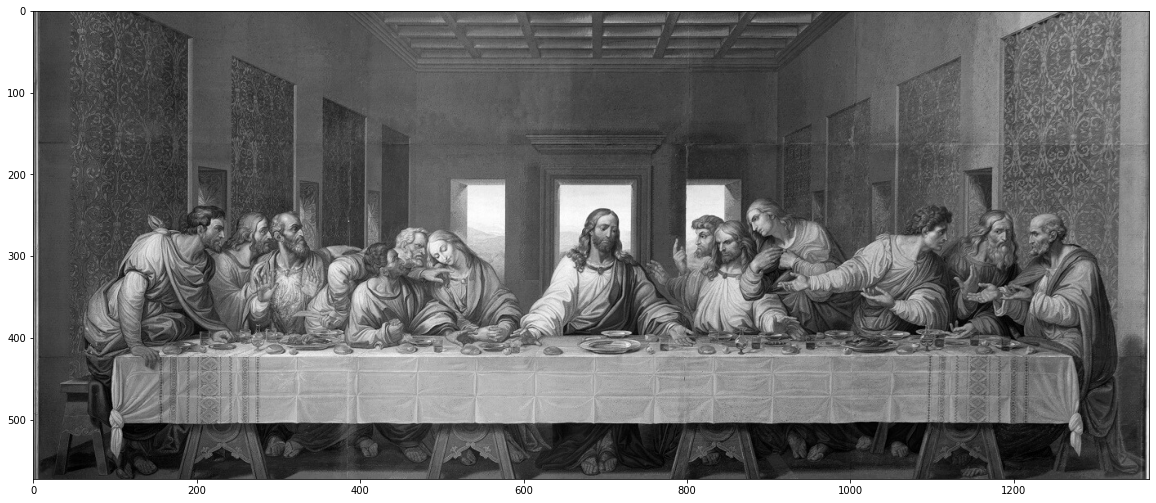

In [ ]:
img = cv2.imdecode(np.asarray(bytearray(urllib.request.urlopen('https://cdn.sightseeingtoursitaly.com/wp-content/uploads/2019/05/Last-Supper-2.jpg').read()), dtype=np.uint8), 0)
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.add_subplot(1,1,1)
plt.imshow(img,'gray')


#Spacial Domain

## Defining the motion blur function for spacial domain

In [ ]:
def motion_blur(img, size=None, angle=None):

    k = np.zeros((size, size), dtype=np.float32)
    k[(size-1)//2, :] = np.ones(size, dtype=np.float32)
    k = cv2.warpAffine(k, cv2.getRotationMatrix2D((size/2-0.5, size/2-0.5), angle, 1.0), (size, size))
    k = k * (1.0/np.sum(k))
    return cv2.filter2D(img, -1, k) 


##Let's blurr

In [ ]:
result500 = motion_blur(img, size=50, angle=0)
result5045 = motion_blur(img, size=50, angle=45)
result5090 = motion_blur(img, size=50, angle=90)
result1000 = motion_blur(img, size=100, angle=0)
result10045 = motion_blur(img, size=100, angle=45)
result10090 = motion_blur(img, size=100, angle=90)
result2000 = motion_blur(img, size=200, angle=0)
result300135 = motion_blur(img, size=300, angle=135)

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

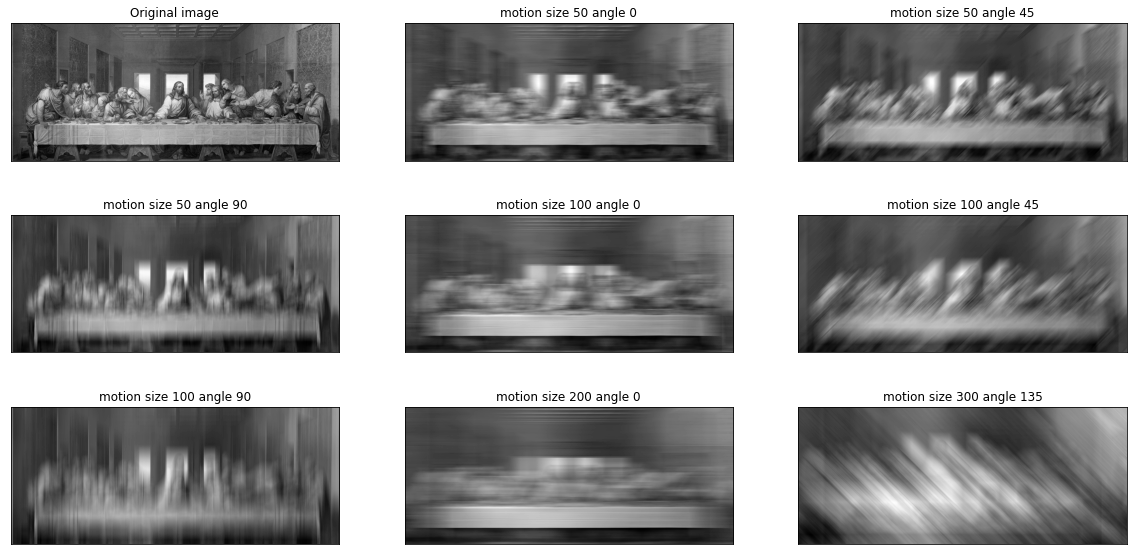

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
plt.subplot(331),plt.imshow(img,'gray'),plt.title('Original image')
plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(result500,'gray'),plt.title('motion size 50 angle 0')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(result5045,'gray'),plt.title('motion size 50 angle 45')
plt.xticks([]), plt.yticks([])
plt.subplot(334),plt.imshow(result5090,'gray'),plt.title('motion size 50 angle 90')
plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(result1000,'gray'),plt.title('motion size 100 angle 0')
plt.xticks([]), plt.yticks([])
plt.subplot(3,3,6),plt.imshow(result10045,'gray'),plt.title('motion size 100 angle 45')
plt.xticks([]), plt.yticks([])
plt.subplot(337),plt.imshow(result10090,'gray'),plt.title('motion size 100 angle 90')
plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(result2000,'gray'),plt.title('motion size 200 angle 0')
plt.xticks([]), plt.yticks([])
plt.subplot(3,3,9),plt.imshow(result300135,'gray'),plt.title('motion size 300 angle 135')
plt.xticks([]), plt.yticks([])



-------


#Frequency Domain

###normalize the input image

In [ ]:
normalimg = img/img.max() 

### We convert the image from the spatial domain to the frequency domain by Fourier transform

In [ ]:
frequency_img = np.fft.fft2(normalimg)

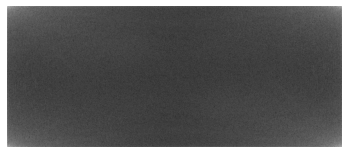

In [ ]:
plt.imshow(np.log1p(np.abs(frequency_img)), cmap='gray')
plt.axis('off')
plt.show()

##motion blur function

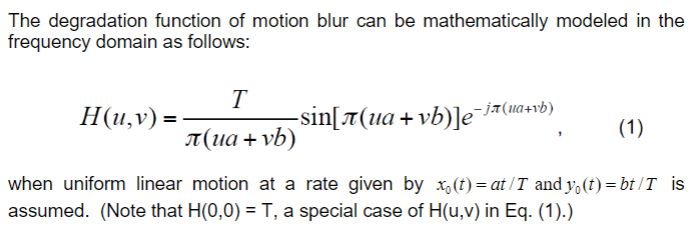

### let's set the motion blur parameters

In [ ]:
T = 0.5 # exposure
a = 0 # vertical motion
b = 0.05 # horizontal motion

In [ ]:
M,N = frequency_img.shape 

### H(u,v) motion blur function in frequency domain

In [ ]:
# Create matrix H (motion blur function H(u,v))
H = np.zeros((M+1,N+1), dtype=np.complex128) # +1 to avoid zero division
# Fill matrix H
for u in range(1,M+1):
    for v in range(1,N+1):
        s = np.pi*(u*a + v*b)
        H[u,v] = (T/s) * np.sin(s) * np.exp(-1j*s)

# index slicing to remove the +1 that we have added before for avoiding zero division
H = H[1:,1:] 

### blur the image in frequency domain

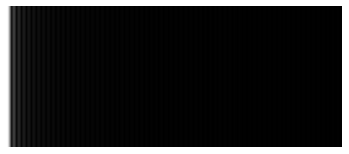

In [ ]:
plt.imshow(np.log1p(np.abs(H)), cmap='gray')
plt.axis('off')
plt.show()
   
# G(u,v), blurred image in frequency domain
G = H * frequency_img

### We convert the image in the frequency domain to the spatial domain using the inverse Fourier transform

In [ ]:
g = np.fft.ifft2(G)
g = np.abs(g)

## The result of blurring in the frequency domain

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb47efd2520>,
 Text(0.5, 1.0, 'blurred image'))

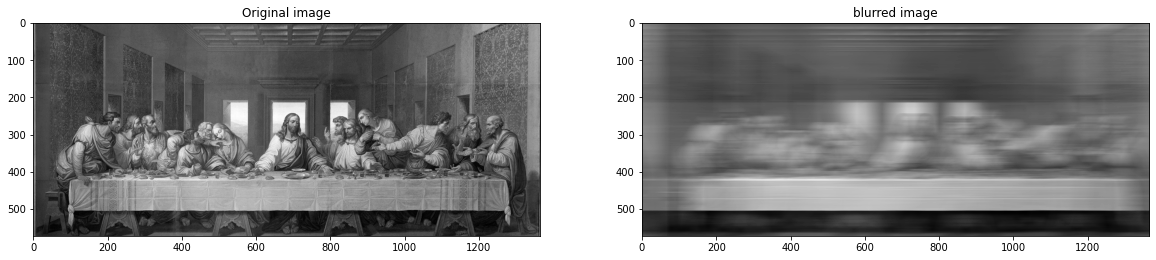

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
plt.subplot(121), plt.imshow(img,'gray'),plt.title('Original image')
plt.subplot(122), plt.imshow(g,'gray'),plt.title('blurred image')

## let's restore the original image from the destructed image

### Details about the motion blur function that we used to blur the image in above

In [ ]:
T = 0.5 # exposure
a = 0 # vertical motion
b = 0.05 # horizontal motion

H = np.zeros((M+1,N+1), dtype=np.complex128) # +1 to avoid zero division
# Fill matrix H
for u in range(1,M+1):
    for v in range(1,N+1):
        s = np.pi*(u*a + v*b)
        H[u,v] = (T/s) * np.sin(s) * np.exp(-1j*s)

# index slicing to remove the +1 that we have added before for avoiding zero division
H = H[1:,1:] 

### Image restoration

We have blurred the image by multiplying the above function in the image in the frequency domain. Now we can restore the image to its original state by dividing the image by the same function.

In [ ]:
restorated_in_fr_domain = G/H
# g(x,y), restored image in spatial domain
restoratedimage = np.fft.ifft2(restorated_in_fr_domain)
restoratedimage = np.abs(restoratedimage)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb47edc4130>,
 Text(0.5, 1.0, 'restored image'))

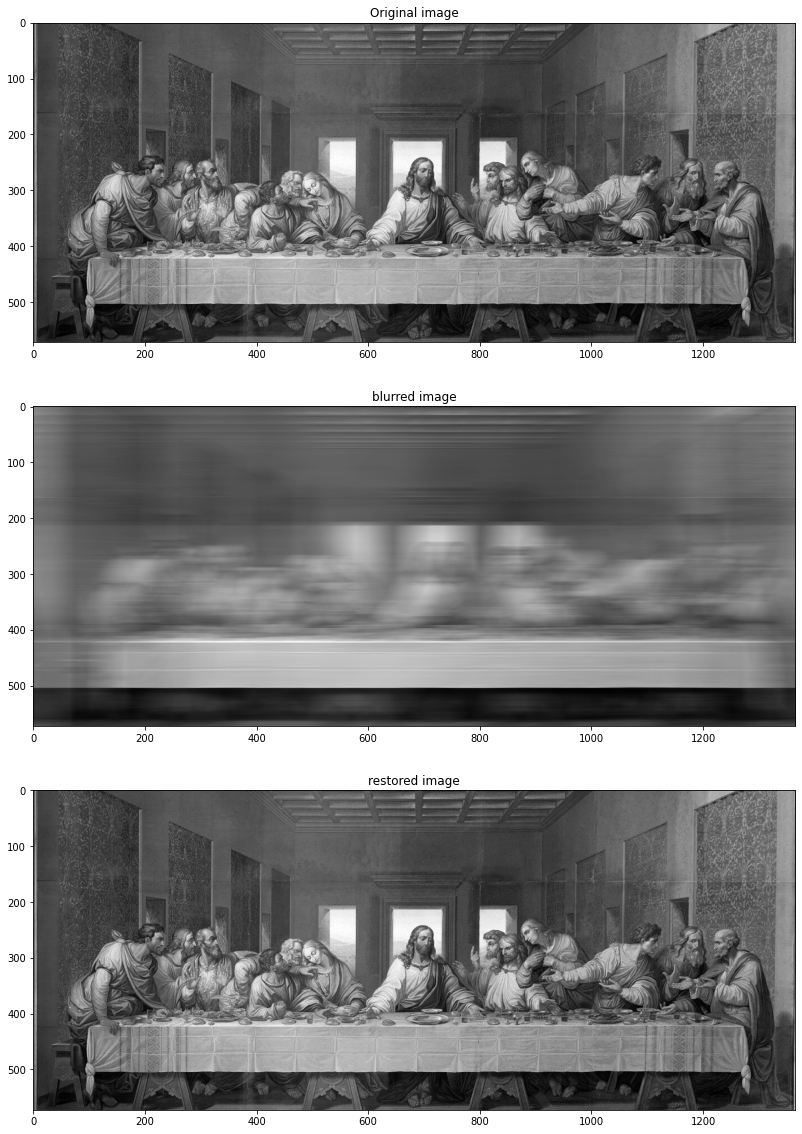

In [ ]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(40)
plt.subplot(311), plt.imshow(img,'gray'),plt.title('Original image')
plt.subplot(312), plt.imshow(g,'gray'),plt.title('blurred image')
plt.subplot(313), plt.imshow(restoratedimage,'gray'),plt.title('restored image')


🏁Done🏁